<a href="https://colab.research.google.com/github/Naveen123github/Calculator/blob/master/Rotten_Tomatoes_Movies3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas openpyxl

In [ ]:
pip install matplotlib seaborn

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from google.colab import files
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import io
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Step 1: Upload the dataset in Google Colab
print("Please upload the Excel file containing the dataset.")
uploaded = files.upload()

Please upload the Excel file containing the dataset.


Saving Rotten_Tomatoes_Movies3.xls to Rotten_Tomatoes_Movies3.xls


In [ ]:
# Load the dataset (assumes the uploaded file is an Excel file)
file_name = list(uploaded.keys())[0]
df = pd.read_excel(uploaded[file_name])  # Correct way to read excel


<ipython-input-23-ab97c54d4fca>:3: FutureWarning: Passing bytes to 'read_excel' is deprecated and will be removed in a future version. To read from a byte string, wrap it in a `BytesIO` object.
  df = pd.read_excel(uploaded[file_name])  # Correct way to read excel


In [ ]:
# Display basic information
print("\nDataset Overview:\n")
print(df.head())


Dataset Overview:

                                         movie_title  \
0  Percy Jackson & the Olympians: The Lightning T...   
1                                        Please Give   
2                                                 10   
3                    12 Angry Men (Twelve Angry Men)   
4                       20,000 Leagues Under The Sea   

                                          movie_info  \
0  A teenager discovers he's the descendant of a ...   
1  Kate has a lot on her mind. There's the ethics...   
2  Blake Edwards' 10 stars Dudley Moore as George...   
3  A Puerto Rican youth is on trial for murder, a...   
4  This 1954 Disney version of Jules Verne's 20,0...   

                                   critics_consensus rating  \
0  Though it may seem like just another Harry Pot...     PG   
1  Nicole Holofcener's newest might seem slight i...      R   
2                                                NaN      R   
3  Sidney Lumet's feature debut is a superbly wri...  

In [ ]:
print("\nStatistical Summary:\n")
print(df.describe())


Statistical Summary:

                    in_theaters_date              on_streaming_date  \
count                          15823                          16636   
mean   1999-10-24 22:10:52.973519488  2008-08-13 13:35:49.266650624   
min              1914-06-01 00:00:00            1935-06-06 00:00:00   
25%              1993-03-29 00:00:00            2003-01-28 00:00:00   
50%              2006-08-04 00:00:00            2008-04-08 00:00:00   
75%              2013-06-28 00:00:00            2014-05-12 00:00:00   
max              2019-12-07 00:00:00            2019-11-01 00:00:00   
std                              NaN                            NaN   

       runtime_in_minutes  tomatometer_rating  tomatometer_count  \
count        16483.000000        16638.000000       16638.000000   
mean           102.391494           60.466522          56.607104   
min              1.000000            0.000000           5.000000   
25%             90.000000           38.000000          12.000000 

In [ ]:
# Check for null values and summary statistics
print("\nMissing Values:\n")
print(df.isnull().sum())


Missing Values:

movie_title              0
movie_info              24
critics_consensus     8329
rating                   0
genre                   17
directors              114
writers               1349
cast                   284
in_theaters_date       815
on_streaming_date        2
runtime_in_minutes     155
studio_name            416
tomatometer_status       0
tomatometer_rating       0
tomatometer_count        0
audience_rating        252
dtype: int64


In [ ]:
print("\nStatistical Summary:\n")
print(df.describe())


Statistical Summary:

                    in_theaters_date              on_streaming_date  \
count                          15823                          16636   
mean   1999-10-24 22:10:52.973519488  2008-08-13 13:35:49.266650624   
min              1914-06-01 00:00:00            1935-06-06 00:00:00   
25%              1993-03-29 00:00:00            2003-01-28 00:00:00   
50%              2006-08-04 00:00:00            2008-04-08 00:00:00   
75%              2013-06-28 00:00:00            2014-05-12 00:00:00   
max              2019-12-07 00:00:00            2019-11-01 00:00:00   
std                              NaN                            NaN   

       runtime_in_minutes  tomatometer_rating  tomatometer_count  \
count        16483.000000        16638.000000       16638.000000   
mean           102.391494           60.466522          56.607104   
min              1.000000            0.000000           5.000000   
25%             90.000000           38.000000          12.000000 

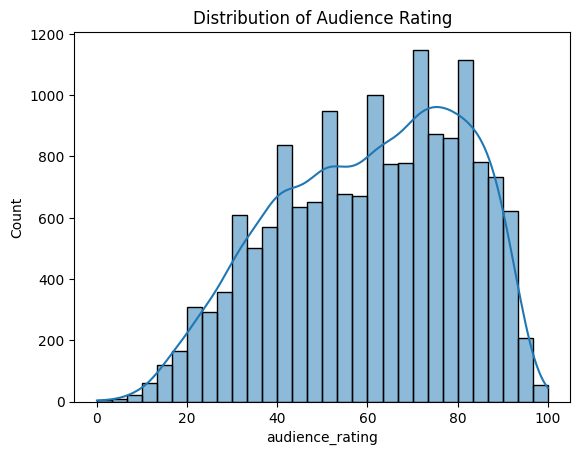

In [ ]:
# Visualize target variable distribution
if 'audience_rating' in df.columns:
    sns.histplot(df['audience_rating'], bins=30, kde=True)
    plt.title('Distribution of Audience Rating')
    plt.show()
else:
    raise ValueError("The target variable 'audience_rating' is not in the dataset.")


In [ ]:
# Step 3: Data Preprocessing
# Handle missing values (e.g., drop or impute)
df = df.dropna()  # Drop rows with missing values

# Convert DateTime columns to numeric features (if any)
datetime_cols = df.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    df[col] = df[col].astype(np.int64)  # Convert to Unix timestamp (numeric format)

# Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature-target split
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 3: Data Preprocessing
# Handle missing values (e.g., drop or impute)
df = df.dropna()  # Drop rows with missing values

# Convert DateTime columns to numeric features (if any)
#datetime_cols = df.select_dtypes(include=['datetime64']).columns #Original line
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns #Updated line to specify nanosecond precision
for col in datetime_cols:
    df[col] = df[col].astype(np.int64)  # Convert to Unix timestamp (numeric format)

# Encode categorical features
label_encoders = {}
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    # Check if the column contains mixed types and convert to string if necessary
    if df[col].apply(type).nunique() > 1:  # Check for multiple types
        df[col] = df[col].astype(str)  # Convert all values to strings

    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Feature-target split
X = df.drop(columns=['audience_rating'])
y = df['audience_rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 4: Model Selection and Training
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Initialize a dictionary to store evaluation results
evaluation_results = {}

# Evaluate models
print("\nModel Performance:")
for name, model in models.items():
    try:
        # Fit the model to the training data
        model.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = model.predict(X_test)

        # Calculate the evaluation metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results in the dictionary
        evaluation_results[name] = {
            'MAE': mae,
            'MSE': mse,
            'R2 Score': r2
        }

        # Print the performance of each model
        print(f"{name} Performance:")
        print(f" MAE: {mae:.4f}, MSE: {mse:.4f}, R2 Score: {r2:.4f}\n")

    except Exception as e:
        # Handle any errors that occur during fitting or prediction
        print(f"Error with model {name}: {e}")

# Optional: Show evaluation results in a DataFrame for better clarity
evaluation_df = pd.DataFrame(evaluation_results)
print("\nModel Evaluation Summary:")
print(evaluation_df)



Model Performance:
Linear Regression Performance:
 MAE: 15.7800, MSE: 356.6930, R2 Score: 0.0623

Decision Tree Performance:
 MAE: 13.1564, MSE: 291.6124, R2 Score: 0.2334

Random Forest Performance:
 MAE: 9.8543, MSE: 158.3718, R2 Score: 0.5837


Model Evaluation Summary:
          Linear Regression  Decision Tree  Random Forest
MAE               15.780037      13.156373       9.854343
MSE              356.693027     291.612352     158.371835
R2 Score           0.062338       0.233420       0.583678


In [ ]:
# Step 5: Hyperparameter Tuning for Random Forest
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [ ]:
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters for Random Forest:", grid_search.best_params_)

Best Hyperparameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}


In [ ]:
# Final Model Evaluation
best_rf = grid_search.best_estimator_
y_pred_final = best_rf.predict(X_test)
print("\nFinal Model Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_final))
print("MSE:", mean_squared_error(y_test, y_pred_final))
print("R2 Score:", r2_score(y_test, y_pred_final))


Final Model Performance:
MAE: 9.799187002613479
MSE: 156.85119099456844
R2 Score: 0.5876750780708746


In [ ]:
# Step 6: Pipeline Creation
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(**grid_search.best_params_, random_state=42))
])

pipeline.fit(X_train, y_train)
final_predictions = pipeline.predict(X_test)
print("Pipeline R2 Score:", r2_score(y_test, final_predictions))

Pipeline R2 Score: 0.5876653907641641


In [ ]:
# Step 7: Predict 'audience_rating' for the existing data (same dataset)
# Preprocess the same dataset for prediction (using the same preprocessing steps as for training data)
df_preprocessed = df.copy()

In [ ]:
# Step 7.1: Apply the same LabelEncoding for categorical features in the dataset
for col in categorical_cols:
    if col in df_preprocessed.columns:
        # Ensure the label encoder was created during training, then apply the same transformation to the data
        df_preprocessed[col] = label_encoders[col].transform(df_preprocessed[col])

In [ ]:
# Step 7.1: Apply the same LabelEncoding for categorical features in the dataset
for col in categorical_cols:
    if col in df_preprocessed.columns:
        # Instead of directly transforming, handle unseen labels
        try:
            df_preprocessed[col] = label_encoders[col].transform(df_preprocessed[col])
        except ValueError as e:
            # Handle unseen labels (e.g., assign a default value or ignore)
            # Here, we'll replace unseen labels with a placeholder value like -1
            unseen_mask = ~df_preprocessed[col].isin(label_encoders[col].classes_)
            df_preprocessed.loc[unseen_mask, col] = -1
            print(f"Warning: Unseen labels in '{col}' replaced with -1.")

In [ ]:
# Step 7.2: Drop any remaining rows with missing values (if any) from the dataset
df_preprocessed = df_preprocessed.dropna()

In [ ]:
# Step 7.3: Ensure all features in df_preprocessed are numeric
# Check if any column is still object or string type after encoding, which should no longer be the case
print(df_preprocessed.dtypes)

movie_title                    int64
movie_info                     int64
critics_consensus              int64
rating                         int64
genre                          int64
directors                      int64
writers                        int64
cast                           int64
in_theaters_date               int64
on_streaming_date              int64
runtime_in_minutes           float64
studio_name                    int64
tomatometer_status             int64
tomatometer_rating             int64
tomatometer_count              int64
audience_rating              float64
predicted_audience_rating    float64
dtype: object


In [ ]:
# Step 7.4: Use the trained pipeline to predict 'audience_rating' for the preprocessed dataset
# Remove the target variable from the prediction data
X_preprocessed = df_preprocessed.drop(columns=['audience_rating'])
predictions = pipeline.predict(X_preprocessed)

In [ ]:
# Step 7.5: Add predictions to the original dataframe as a new column
df['predicted_audience_rating'] = predictions

In [ ]:
# Step 7.6: Display predictions for the 'audience_rating' column in the dataset
print("\nPredicted 'audience_rating' for the existing dataset:")
print(df[['audience_rating', 'predicted_audience_rating']].head())


Predicted 'audience_rating' for the existing dataset:
   audience_rating  predicted_audience_rating
0             53.0                  48.960283
1             64.0                  69.812866
3             97.0                  92.819065
4             74.0                  79.094137
5             37.0                  39.482731


In [ ]:
# Step 8: Save the Pipeline for Future Use (Optional, if you want to save the trained pipeline)
pipeline_filename = 'audience_rating_pipeline.pkl'
joblib.dump(pipeline, pipeline_filename)
print(f"Pipeline saved as {pipeline_filename}")


Pipeline saved as audience_rating_pipeline.pkl


In [ ]:
# Step 9: Validate Model Accuracy on Test Set (using the original data)
print("\nFinal Model Accuracy Validation (on the test set):")
print("R2 Score on Test Set:", r2_score(y_test, final_predictions))
print("MAE on Test Set:", mean_absolute_error(y_test, final_predictions))
print("MSE on Test Set:", mean_squared_error(y_test, final_predictions))

# Conclusion
print("\nProject Completed Successfully! Use the saved pipeline for future predictions.")


Final Model Accuracy Validation (on the test set):
R2 Score on Test Set: 0.5876653907641641
MAE on Test Set: 9.800215142791721
MSE on Test Set: 156.85487611160661

Project Completed Successfully! Use the saved pipeline for future predictions.
